**Load Libraries**

In [13]:
import numpy as np
import pandas as pd
from sklearn import metrics

**Importing the Dataset**

In [40]:

df=pd.read_csv("/content/PlayTennis.csv")
value=['Outlook','Temperature','Humidity','Wind']
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


**Data Analysis**

In [15]:
len(df)

14

In [42]:
df.shape

(14, 5)

In [41]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [43]:
df.tail()

,Outlook,Temperature,Humidity,Wind,Play_Tennis
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [44]:
df.describe()

,Outlook,Temperature,Humidity,Wind,Play_Tennis
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


**Preparing the Data**

In [45]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     
df=df.apply(string_to_int.fit_transform)
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [46]:
feature_cols = ['Outlook','Temperature','Humidity','Wind']
X = df[feature_cols ] 
y = df.Play_Tennis

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Training and Making Predictions**

In [48]:
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [49]:
y_pred= classifier.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2


In [51]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
2,1,0
10,1,1
4,1,0
7,0,1
13,0,1


**Evaluating the Algorithm**

In [52]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[0 2]
 [2 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



**Visualizing Decision Trees**

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


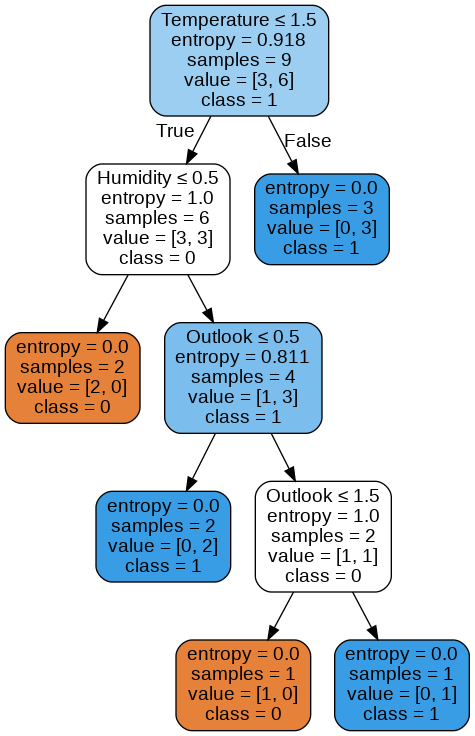

In [53]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())
